In [1]:
%cd ..

c:\Users\jeong\Desktop\space-decomposition


In [2]:
from src.datasets import WiderPerson, VisDrone
from PIL import Image, ImageDraw
from torch.utils.data.dataset import ConcatDataset

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def transfrom_widerperson_target(target):
    return list(filter(lambda x: x[0] in [1, 2, 3, 5], target))


def transfrom_visdrone_target(target):
    return list(filter(lambda x: x[0] in [1, 2], target))


widerperson = WiderPerson("D:\\datasets\\\WiderPerson",
                          target_transform=transfrom_widerperson_target)
visdrone = VisDrone("D:\\datasets\\VisDrone2019-DET-train",
                    target_transform=transfrom_visdrone_target)
ds = ConcatDataset([widerperson, visdrone])

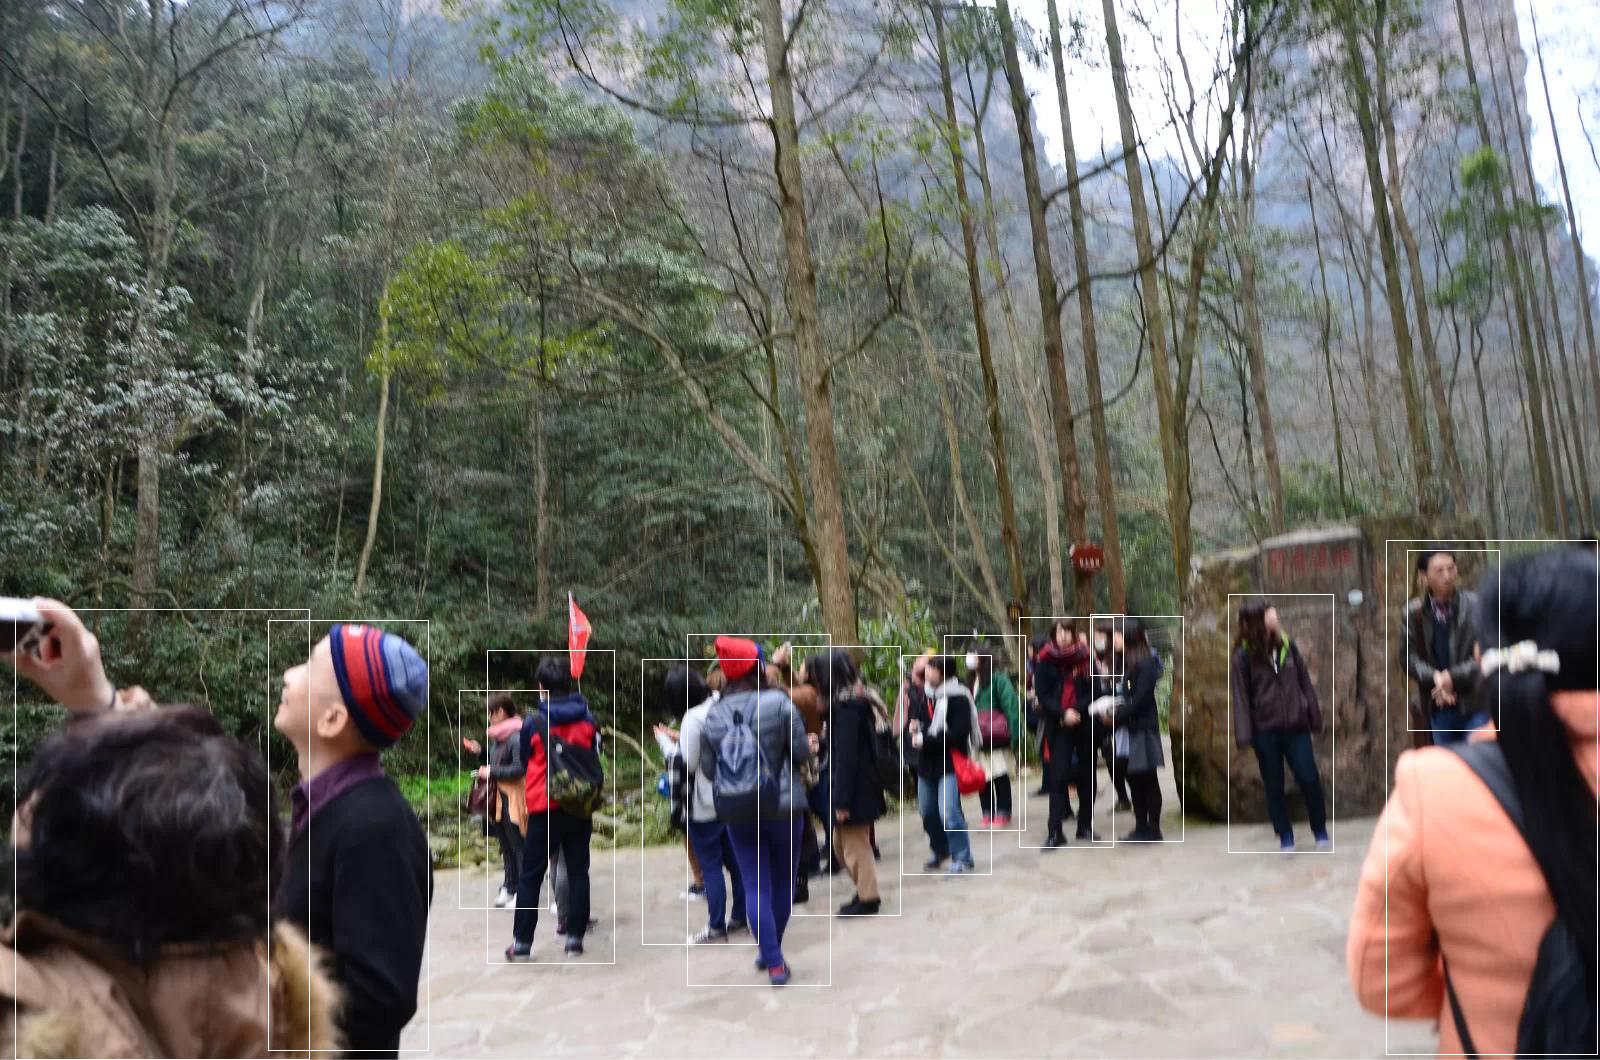

In [9]:
image, label = ds[599]
draw = ImageDraw.Draw(image)
for l in label:
    xyxy = np.array(l[1:])
    xyxy[[0,2]] *= image.size[0]
    xyxy[[1,3]] *= image.size[1]
    xyxy = xyxy.astype(np.int)
    draw.rectangle(tuple(xyxy))
image

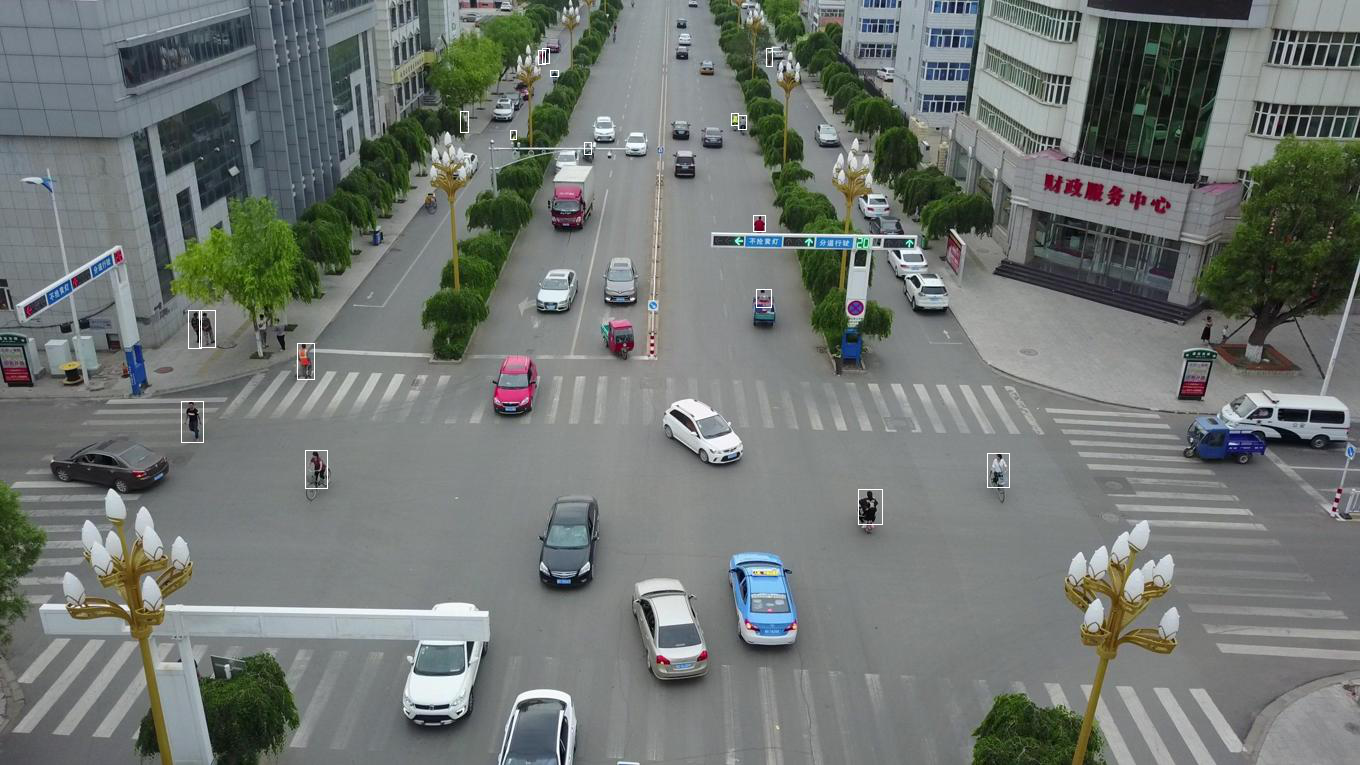

In [12]:
image, label = ds[8800]
draw = ImageDraw.Draw(image)
for l in label:
    xyxy = np.array(l[1:])
    xyxy[[0,2]] *= image.size[0]
    xyxy[[1,3]] *= image.size[1]
    xyxy = xyxy.astype(np.int)
    draw.rectangle(tuple(xyxy))
image

In [11]:
len(widerperson) + len(visdrone) == len(ds)

True